# BUSINESS UNDERSTANDING

# DATA UNDERSTANDING
### Collecting The Sonic Features
Collecting implicitly labeled songs from playlists such as 'top 100 country songs'. Experiment can be rerun with different genres.

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
plt.style.use('seaborn')

In [2]:
from genres import collect_genre_features
%load_ext autoreload
%autoreload 2

In [3]:
genres = {
    'country': 'https://www.youtube.com/playlist?list=PL3oW2tjiIxvQW6c-4Iry8Bpp3QId40S5S', 
    'jazz': 'https://www.youtube.com/playlist?list=PL8F6B0753B2CCA128', 
    'hip_hop': 'https://www.youtube.com/playlist?list=PLAPo1R_GVX4IZGbDvUH60bOwIOnZplZzM', 
    'classical': 'https://www.youtube.com/playlist?list=PLRb-5mC4V_Lop8KLXqSqMv4_mqw5M9jjW', 
    'metal': 'https://www.youtube.com/playlist?list=PLfY-m4YMsF-OM1zG80pMguej_Ufm8t0VC', 
    'electronic': 'https://www.youtube.com/playlist?list=PLDDAxmBan0BKeIxuYWjMPBWGXDqNRaW5S'
}

In [4]:
# collect_genre_features(genres)     # Started 8:55 done around 11:28

In [7]:
df = pd.read_json('data/genre_features.json', lines=True)

In [8]:
df.head()

,song,genre,tempo,beats,chroma_stft,rms,spec_cent,spec_bw,rolloff,zcr,...,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12
0,data/Blake Shelton - God's Country (Official M...,country,140.625000,16,0.403930,0.143867,1507.265314,2044.584088,2611.347368,0.024373,...,17.539587,16.890709,-4.263755,5.052443,-2.659404,1.152874,-3.776567,1.217376,-0.123550,1.816821
1,data/Blake Shelton - God's Country (Official M...,country,93.750000,13,0.512143,0.219117,1153.921325,2121.553618,2114.339594,0.015499,...,15.839293,21.270155,-4.460384,17.987693,1.827632,4.848183,4.518678,14.389262,6.494670,8.106324
2,data/Blake Shelton - God's Country (Official M...,country,140.625000,17,0.384510,0.200544,1949.457103,2539.648618,3518.165025,0.040855,...,-27.584254,32.618530,-12.456574,16.865530,-10.530978,1.373314,4.697869,-0.763166,0.506820,-1.640339
3,data/Blake Shelton - God's Country (Official M...,country,140.625000,19,0.458039,0.152172,2036.882285,2596.601459,3715.305573,0.043307,...,-27.447726,25.412308,-4.295873,20.958522,-13.558967,3.744155,2.537393,-5.474003,3.007980,0.139808
4,data/Blake Shelton - God's Country (Official M...,country,137.195122,19,0.406116,0.165826,2092.116714,2615.094470,3907.596983,0.042374,...,-36.062469,31.694527,-6.349593,16.525980,-16.033182,1.924801,3.993040,-2.284277,3.555872,-3.338829


Each row contains the sonic features for a unique 10 second audio portion of a song's video.  
If a song is longer than 4 minutes, we only have the first 4 minutes of it.  
There may be statistical noise in the form of cinematic intros and dialogue.  

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14221 entries, 0 to 14220
Data columns (total 22 columns):
song           14221 non-null object
genre          14221 non-null object
tempo          14221 non-null float64
beats          14221 non-null int64
chroma_stft    14221 non-null float64
rms            14221 non-null float64
spec_cent      14221 non-null float64
spec_bw        14221 non-null float64
rolloff        14221 non-null float64
zcr            14221 non-null float64
mfcc1          14221 non-null float64
mfcc2          14221 non-null float64
mfcc3          14221 non-null float64
mfcc4          14221 non-null float64
mfcc5          14221 non-null float64
mfcc6          14221 non-null float64
mfcc7          14221 non-null float64
mfcc8          14221 non-null float64
mfcc9          14221 non-null float64
mfcc10         14221 non-null float64
mfcc11         14221 non-null float64
mfcc12         14221 non-null float64
dtypes: float64(19), int64(1), object(2)
memory usage: 2.4+

In [10]:
df.describe()

,tempo,beats,chroma_stft,rms,spec_cent,spec_bw,rolloff,zcr,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12
count,14221.000000,14221.000000,14221.000000,1.422100e+04,14221.000000,14221.000000,14221.000000,14221.000000,14221.000000,14221.000000,14221.000000,14221.000000,14221.000000,14221.000000,14221.000000,14221.000000,14221.000000,14221.000000,14221.000000,14221.000000
mean,123.877165,16.844737,0.443863,1.434939e-01,2609.177371,3021.386200,5447.083496,0.053856,-206.374144,154.071389,-26.821587,39.651674,-8.947559,22.079281,-9.019789,8.387313,-2.560055,2.848200,-1.320666,1.496433
std,28.835460,5.273632,0.101964,9.079989e-02,973.607440,860.199641,2262.208638,0.024929,122.375676,33.355465,26.996297,20.150378,15.008151,14.093309,10.156270,10.985460,7.931514,8.876211,6.826914,6.783699
min,0.000000,0.000000,0.014646,1.300000e-07,86.838680,131.910565,220.357283,0.000000,-1131.169932,-4.373793,-148.318612,-72.307724,-72.412640,-51.197688,-53.529320,-47.545347,-45.017744,-34.719592,-31.812165,-28.035189
25%,102.272727,13.000000,0.371373,7.122163e-02,1873.374870,2462.271101,3687.358409,0.036087,-265.876794,132.594325,-44.093998,29.390454,-19.212546,12.853214,-15.867217,0.948114,-7.592941,-3.202784,-5.444592,-3.042765
50%,123.046875,17.000000,0.440263,1.257676e-01,2657.672895,3163.297324,5625.051286,0.050929,-182.180423,150.516281,-28.795084,43.079256,-10.150359,25.238659,-9.446236,9.344458,-2.655606,3.385079,-1.230880,1.719454
75%,140.625000,20.000000,0.511621,2.090934e-01,3288.799784,3646.202202,7071.378598,0.068574,-118.935035,173.251361,-12.043338,53.104016,0.200548,32.505632,-2.574528,16.406354,2.418753,9.259189,3.115380,6.198783
max,296.052632,45.000000,0.818398,4.753521e-01,9485.143131,6737.909514,16703.543697,0.411476,19.395472,282.765395,119.481801,95.765919,70.729154,66.191671,37.223777,39.297424,52.429948,35.517148,24.536454,40.309129


Tempo and Beats columns both have a minimum of 0.

In [12]:
df[df.tempo == 0]

,song,genre,tempo,beats,chroma_stft,rms,spec_cent,spec_bw,rolloff,zcr,...,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12
310,data/Michael Ray - 'Her World Or Mine' (Offici...,country,0.0,0,0.649569,4.093727e-02,260.793944,821.496664,322.922626,0.005547,...,93.357862,24.540389,11.467550,29.425064,37.223777,23.608315,7.081930,3.653712,9.007935,10.454095
333,data/Michael Ray - 'Her World Or Mine' (Offici...,country,0.0,0,0.411900,7.736127e-03,1487.213060,2889.444379,2647.338029,0.014038,...,69.200866,28.289565,8.879934,4.540916,5.477187,4.320944,0.860505,-0.961800,-1.144125,-1.537118
451,data/Thomas Rhett - Marry Me.m4a,country,0.0,0,0.476489,1.793852e-02,579.779637,1569.123009,583.690068,0.010931,...,104.729935,56.780392,24.442164,6.382798,-3.175132,-6.247894,-3.978600,-0.178701,1.134666,-0.590083
452,data/Thomas Rhett - Marry Me.m4a,country,0.0,0,0.326175,1.711473e-03,1902.167642,3322.607427,4284.861943,0.012834,...,64.660661,36.385373,12.741408,-2.520514,-9.812921,-11.293638,-9.811411,-7.874738,-6.952056,-7.378253
2053,data/Brett Young - Like I Loved You (Official ...,country,0.0,0,0.738303,1.201080e-02,4413.860407,3674.954902,7094.531250,0.101164,...,41.827923,23.284791,12.837447,10.641653,12.627291,14.782416,14.721413,11.814138,7.413345,3.739335
8228,data/Tchaikovsky Nutcracker Suite - Russian Da...,classical,0.0,0,0.197638,1.300000e-07,2294.690142,1227.720455,3710.194052,0.000280,...,0.004952,0.158291,-0.197204,0.123918,-0.021352,-0.040066,0.049158,-0.035658,0.026118,-0.023258
10794,data/CASTLE OF GLASS (Official Video) - Linkin...,metal,0.0,0,0.359763,9.640968e-03,1799.472805,2325.119983,3046.200360,0.038897,...,82.821664,37.320327,9.625761,0.393513,-1.607742,-5.717143,-11.990768,-15.145560,-12.486634,-6.493266
10795,data/CASTLE OF GLASS (Official Video) - Linkin...,metal,0.0,0,0.271093,1.678234e-02,491.216182,994.046901,575.468084,0.016763,...,107.969559,31.177091,-7.279315,-11.661841,-7.144316,-10.601016,-19.230758,-22.228041,-16.043721,-6.552666


In [25]:
display(df[df.song.str.contains('Her World')].head(2))
df[df.song.str.contains('Her World')].tail(2)

,song,genre,tempo,beats,chroma_stft,rms,spec_cent,spec_bw,rolloff,zcr,...,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12
310,data/Michael Ray - 'Her World Or Mine' (Offici...,country,0.000000,0,0.649569,0.040937,260.793944,821.496664,322.922626,0.005547,...,93.357862,24.540389,11.467550,29.425064,37.223777,23.608315,7.081930,3.653712,9.007935,10.454095
311,data/Michael Ray - 'Her World Or Mine' (Offici...,country,148.026316,6,0.567262,0.071943,349.412958,910.173911,517.823942,0.008759,...,64.838291,33.412068,26.285623,21.677555,21.998578,20.093630,9.976284,6.886191,7.308717,4.199815


,song,genre,tempo,beats,chroma_stft,rms,spec_cent,spec_bw,rolloff,zcr,...,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12
332,data/Michael Ray - 'Her World Or Mine' (Offici...,country,95.338983,6,0.296149,0.124329,836.217702,1333.988430,1299.708596,0.020044,...,33.470018,1.495006,5.769001,7.642518,-4.431990,0.030497,-4.946299,0.012797,0.450586,-7.610033
333,data/Michael Ray - 'Her World Or Mine' (Offici...,country,0.000000,0,0.411900,0.007736,1487.213060,2889.444379,2647.338029,0.014038,...,69.200866,28.289565,8.879934,4.540916,5.477187,4.320944,0.860505,-0.961800,-1.144125,-1.537118


In [23]:
df[df.song.str.contains('Marry Me')].tail(3)

,song,genre,tempo,beats,chroma_stft,rms,spec_cent,spec_bw,rolloff,zcr,...,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12
450,data/Thomas Rhett - Marry Me.m4a,country,170.454545,21,0.344992,0.059291,1987.248884,2564.434783,4031.972389,0.042889,...,-11.390502,28.486993,1.788494,15.530180,-18.985088,2.524289,-7.584710,2.380510,-6.761145,-4.564318
451,data/Thomas Rhett - Marry Me.m4a,country,0.000000,0,0.476489,0.017939,579.779637,1569.123009,583.690068,0.010931,...,104.729935,56.780392,24.442164,6.382798,-3.175132,-6.247894,-3.978600,-0.178701,1.134666,-0.590083
452,data/Thomas Rhett - Marry Me.m4a,country,0.000000,0,0.326175,0.001711,1902.167642,3322.607427,4284.861943,0.012834,...,64.660661,36.385373,12.741408,-2.520514,-9.812921,-11.293638,-9.811411,-7.874738,-6.952056,-7.378253


These are intros and outros.  
A case could be made to:  
1. drop them as statistical noise in the tempo and beats columns.  
2. keep them as relevant audio in the spectral features.  
3. replace the 0s with the average tempo of the rest of the song.

As this is a first iteration we will include the rows with 0s unaltered

### Examine the distribution of data points among genres.

In [11]:
df.groupby('genre').song.count()

genre
classical     2320
country       2389
electronic    2371
hip_hop       2345
jazz          2397
metal         2399
Name: song, dtype: int64

In [15]:
df.groupby('genre').song.nunique()

genre
classical      97
country       100
electronic     99
hip_hop        98
jazz          100
metal         100
Name: song, dtype: int64

The dataset is roughly balanced among genres

### Examine the distribution of features among genres

In [101]:
c_options = ['darkorange', 'green', 'deepskyblue', 'mediumblue', 'black', 'deeppink']
colors = {k:v for k, v in zip(genres.keys(), c_options)}
colors

{'country': 'darkorange',
 'jazz': 'green',
 'hip_hop': 'deepskyblue',
 'classical': 'mediumblue',
 'metal': 'black',
 'electronic': 'deeppink'}

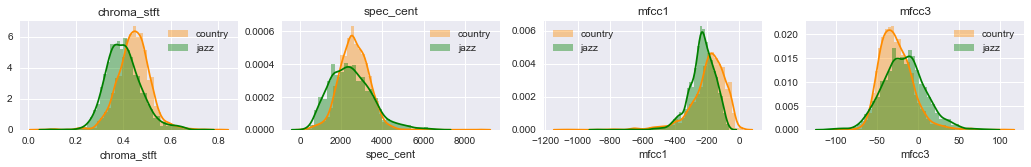

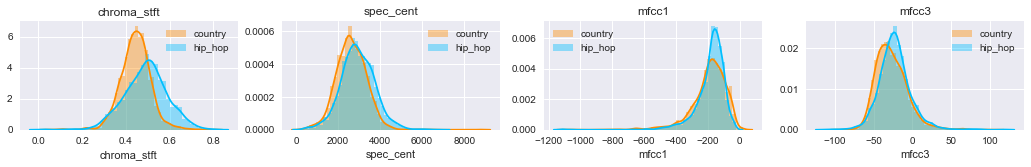

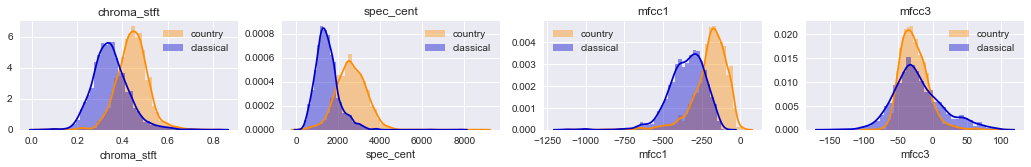

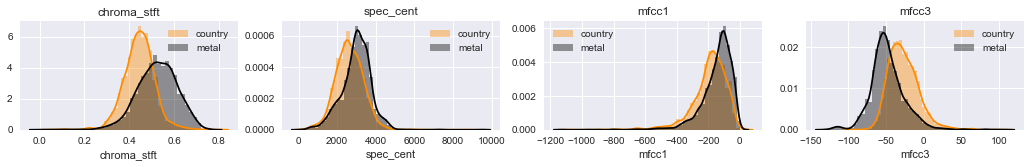

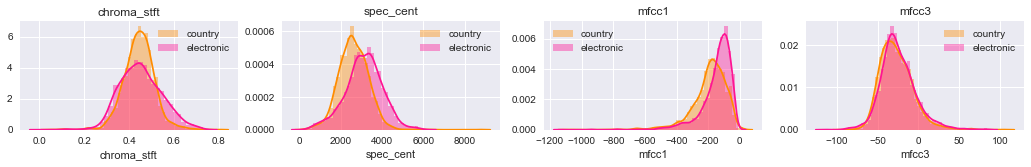

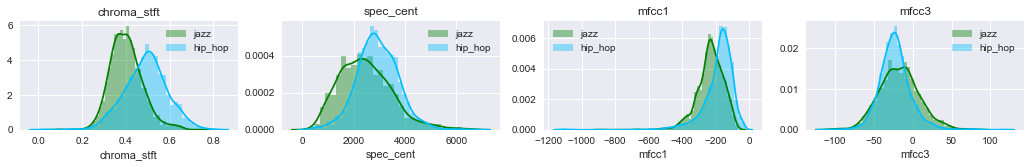

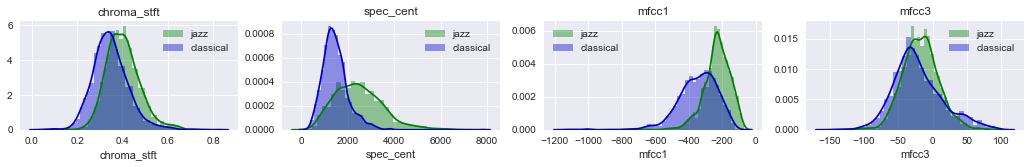

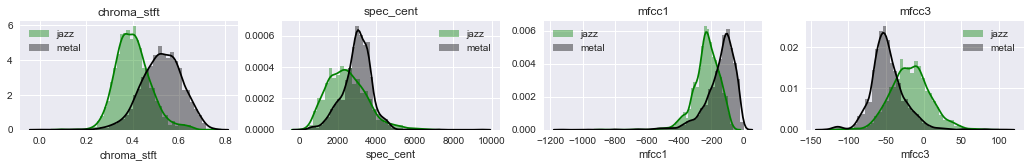

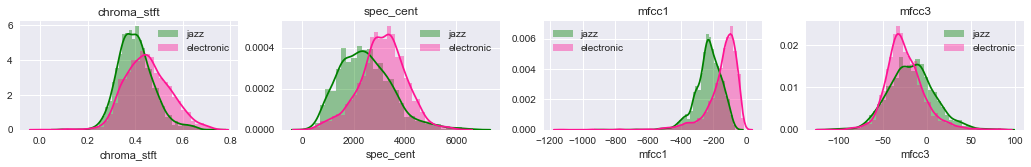

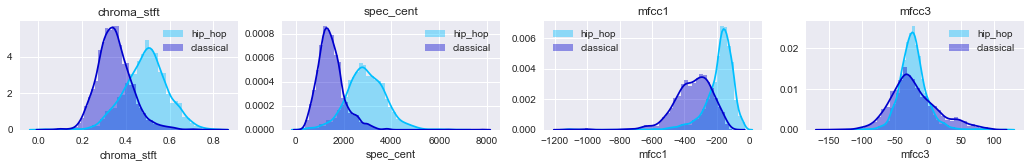

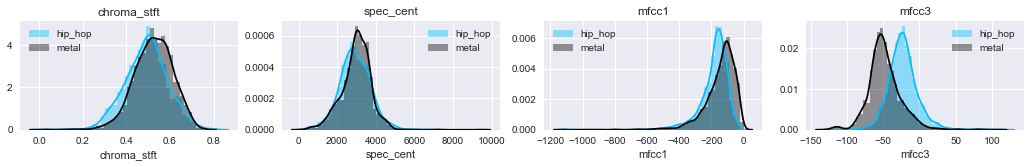

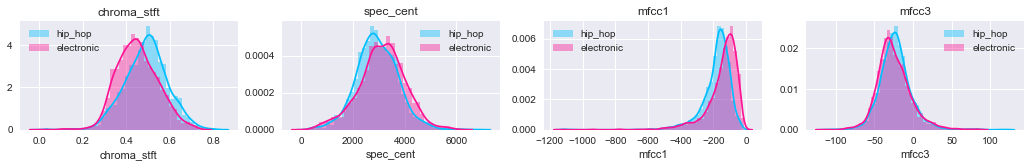

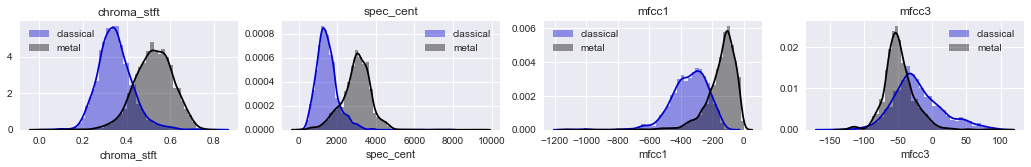

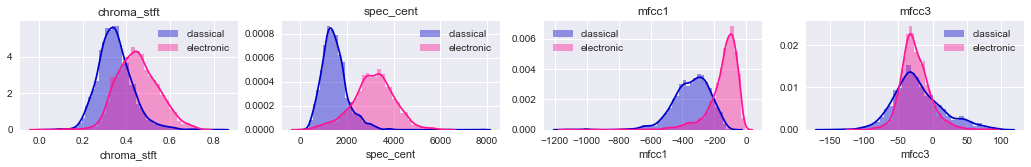

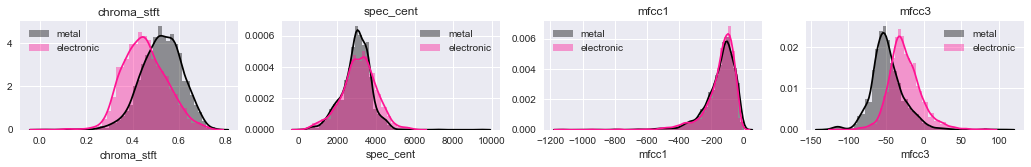

In [102]:
cols = ['chroma_stft', 'spec_cent', 'mfcc1', 'mfcc3']
for g1, g2 in itertools.combinations(df.genre.unique(), 2):
    plt.figure(figsize=(18,2))
    for i, col in enumerate(cols, start=1):
        plt.subplot(1, len(cols), i)
        s1 = df.loc[df.genre == g1, col]
        s2 = df.loc[df.genre == g2, col]
        sns.distplot(s1, label=g1, color=colors[g1])
        sns.distplot(s2, label=g2, color=colors[g2])
        plt.title(col)
        plt.legend()
    plt.show()

# DATA PREPARATION

In [118]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

In [110]:
y = df['genre']
X = df.drop(['genre', 'song'], axis=1)
X_work, X_holdout, y_work, y_holdout = train_test_split(X, y, test_size=0.2, random_state=111)
X_train, X_test, y_train, y_test = train_test_split(X_work, y_work, test_size=0.2, random_state=111)

In [114]:
y_train.value_counts()

jazz          1556
metal         1543
country       1532
electronic    1504
hip_hop       1495
classical     1470
Name: genre, dtype: int64

Training set is well balanced

In [ ]:
logit = Pipeline(steps=[
    ('scaling', StandardScaler()),
    ('classifier', LogisticRegression())
])

In [ ]:
GridSearchCV()

# MODELING

# EVALUATION

# DEPLOYMENT